In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import cv2
import pathlib
import PIL

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
url="/content/drive/MyDrive/re_brain"

In [ ]:
url=pathlib.Path(url)

In [ ]:
data={"yes":list(url.glob("yes/*")),
      "no":list(url.glob("no/*"))}

In [ ]:
data_index={"yes":1,"no":0}

In [ ]:
len(data["yes"])

1500

In [ ]:
len(data["no"])

1500

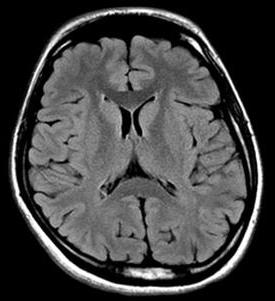

In [ ]:
PIL.Image.open(data["no"][0])

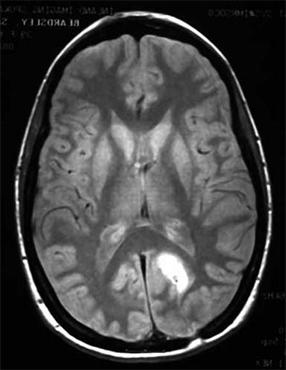

In [ ]:
PIL.Image.open(data["yes"][700])

In [ ]:
x,y=[],[]
for name,lis in data.items():
  for l in lis:
    img_arr=cv2.imread(str(l))
    img_res=cv2.resize(img_arr,(224,224))
    x.append(img_res)
    y.append(data_index[name])

In [ ]:
x=np.array(x)
y=np.array(y)


In [ ]:
x.shape

(3000, 224, 224, 3)

In [ ]:
y.shape

(3000,)

In [ ]:
x=x/255

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import tensorflow_hub as hub

In [ ]:
len(x_train)

2400

In [ ]:
data_augmentation=keras.Sequential([
        keras.layers.experimental.preprocessing.RandomZoom(0.2),
        keras.layers.experimental.preprocessing.RandomContrast(0.3)
])

In [ ]:
model=keras.Sequential([
              data_augmentation,
              hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5",trainable=False,input_shape=(224,224,3)),
              keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="BinaryCrossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=40)

Epoch 1/40
75/75 [==============================] - 37s 39ms/step - loss: 0.5121 - accuracy: 0.7912
Epoch 2/40
75/75 [==============================] - 3s 40ms/step - loss: 0.3724 - accuracy: 0.8712
Epoch 3/40
75/75 [==============================] - 3s 40ms/step - loss: 0.3221 - accuracy: 0.8838
Epoch 4/40
75/75 [==============================] - 3s 39ms/step - loss: 0.2923 - accuracy: 0.8963
Epoch 5/40
75/75 [==============================] - 3s 40ms/step - loss: 0.2655 - accuracy: 0.9100
Epoch 6/40
75/75 [==============================] - 3s 40ms/step - loss: 0.2502 - accuracy: 0.9083
Epoch 7/40
75/75 [==============================] - 3s 40ms/step - loss: 0.2471 - accuracy: 0.9121
Epoch 8/40
75/75 [==============================] - 3s 40ms/step - loss: 0.2293 - accuracy: 0.9200
Epoch 9/40
75/75 [==============================] - 3s 40ms/step - loss: 0.2223 - accuracy: 0.9183
Epoch 10/40
75/75 [==============================] - 3s 40ms/step - loss: 0.2166 - accuracy: 0.9246
Epoch 11

In [ ]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 2s 91ms/step - loss: 0.1310 - accuracy: 0.9617


[0.13103321194648743, 0.9616666436195374]

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_pred=[]
for i in y_predict:
  if i[0]>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred=np.array(y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.recall_score(y_test,y_pred)

0.9666666666666667

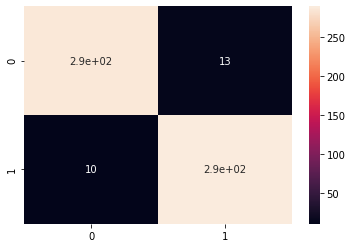

In [ ]:
sb.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
model.save("brain")

INFO:tensorflow:Assets written to: brain/assets


INFO:tensorflow:Assets written to: brain/assets


In [ ]:
model_=keras.models.load_model("/content/brain")

In [ ]:
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1024)              5607184   
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 5,608,209
Trainable params: 1,025
Non-trainable params: 5,607,184
_________________________________________________________________


In [ ]:
model_.predict(x_test[0].reshape(1,224,224,3))

array([[0.02827116]], dtype=float32)